# Importing Necessary Packages

In [2]:
import numpy as np
import keras
import tensorflow as tf
from keras import layers
from keras import models
from keras.datasets import mnist

# Data Preparation

In [3]:
from keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = to_categorical(y_train, num_classes=10)
Y_test = to_categorical(y_test, num_classes=10)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


# CNN Model

In [7]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1),
          padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1),
          padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [8]:
history=model.fit(X_train, Y_train, batch_size=256,
                  epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
235/235 [==============================] - 38s 159ms/step - loss: 0.3190 - accuracy: 0.9075 - val_loss: 0.0750 - val_accuracy: 0.9771
Epoch 2/10
235/235 [==============================] - 35s 149ms/step - loss: 0.0824 - accuracy: 0.9746 - val_loss: 0.0453 - val_accuracy: 0.9854
Epoch 3/10
235/235 [==============================] - 35s 151ms/step - loss: 0.0567 - accuracy: 0.9823 - val_loss: 0.0376 - val_accuracy: 0.9867
Epoch 4/10
235/235 [==============================] - 37s 157ms/step - loss: 0.0458 - accuracy: 0.9859 - val_loss: 0.0316 - val_accuracy: 0.9893
Epoch 5/10
235/235 [==============================] - 36s 154ms/step - loss: 0.0386 - accuracy: 0.9880 - val_loss: 0.0280 - val_accuracy: 0.9907
Epoch 6/10
235/235 [==============================] - 36s 154ms/step - loss: 0.0316 - accuracy: 0.9898 - val_loss: 0.0252 - val_accuracy: 0.9915
Epoch 7/10
235/235 [==============================] - 36s 151ms/step - loss: 0.0283 - accuracy: 0.9910 - val_loss: 0.0248 - val_ac

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 64)         

In [10]:
test_scores = model.evaluate(X_test, Y_test, verbose=2)
loss_cnn = test_scores[0]*100
accuracy_cnn =  test_scores[1]*100
print('Test loss:', loss_cnn)
print('Test accuracy:', accuracy_cnn)

313/313 - 3s - loss: 0.0256 - accuracy: 0.9907 - 3s/epoch - 11ms/step
Test loss: 2.5590840727090836
Test accuracy: 99.07000064849854


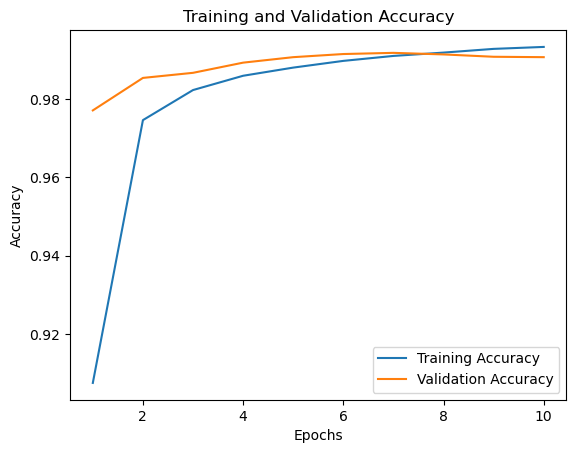

In [11]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

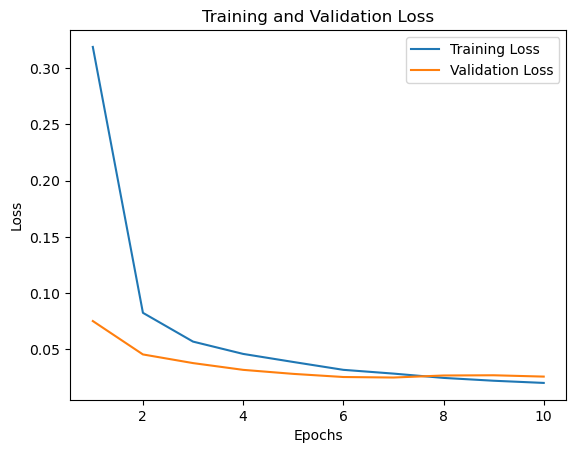

In [12]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()